In [25]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from tensorflow.python.keras.layers import Dense, Dropout, Input
from tensorflow.python.keras.models import Model,Sequential
from tensorflow.python.keras.datasets import mnist
from tqdm import tqdm
from tensorflow.python.keras.layers.advanced_activations import LeakyReLU
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import seaborn as sns
import itertools


from tensorflow.keras.datasets import fashion_mnist




4423680/4422102 [==============================] - 0s 0us/step


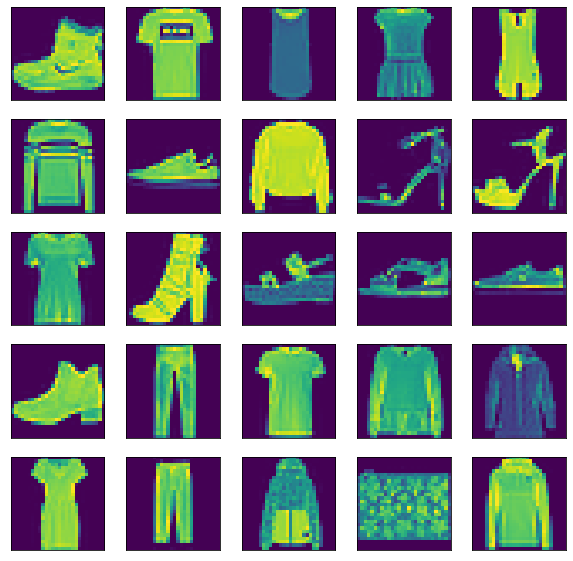

In [2]:
(x_train, y_train), (x_test,y_test)= fashion_mnist.load_data()

plt.figure(figsize=(10,10))
for i in range(1,26):
  plt.subplot(5,5,i)
  plt.imshow(x_train[i-1])
  plt.xticks([])
  plt.yticks([])

In [30]:
#size = size of filter, dropout fraction = dropout_size, 
def Convmodel(size,dropout_size,epoch,lr1):
  (x_train, y_train), (x_test,y_test)= fashion_mnist.load_data()

  x_train = x_train/255.0
  x_test = x_test/255.0

  #Classification
  from keras.models import Sequential
  from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten,AvgPool2D
  from keras.utils import np_utils
  from keras.datasets import mnist
  from keras.callbacks import EarlyStopping, ModelCheckpoint
  from sklearn.metrics import confusion_matrix, accuracy_score
  from sklearn.metrics import plot_confusion_matrix



  from sklearn.metrics import accuracy_score,fbeta_score
  x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
  x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')

  # one-hot encoding using keras' numpy-related utilities
  n_classes = 10
  print("Shape before one-hot encoding: ", y_train.shape)
  y_train = np_utils.to_categorical(y_train, n_classes)
  y_test = np_utils.to_categorical(y_test, n_classes)
  print("Shape after one-hot encoding: ", y_train.shape)

  #es = EarlyStopping(monitor='val_loss', mode='min', patience=10)

  # building a linear stack of layers with the sequential model
  model = Sequential()
  # convolutional layer
  model.add(Conv2D(128, kernel_size=(size,size), strides=(1,1), padding='same', activation='relu', input_shape=(28,28,1)))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(dropout_size))
  model.add(Conv2D(64, kernel_size=(size,size), strides=(1,1), padding='same', activation='relu', input_shape=(28,28,1)))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Dropout(dropout_size))

  # flatten output of conv
  model.add(Flatten())
  # hidden layer
  model.add(Dense(300, activation='relu'))
  model.add(Dropout(dropout_size))
  # output layer
  model.add(Dense(10, activation='softmax'))

  es = EarlyStopping(monitor='val_loss', mode='min', patience=10)


  # compiling the sequential model
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer= tf.keras.optimizers.Adam(lr=lr1))

  # training the model for 10 epochs
  history = model.fit(x_train, y_train, epochs=epoch, validation_data=(x_test, y_test),callbacks=es)

  val_loss = history.history['val_loss']
  val_accuracy = history.history['val_accuracy']


  train_loss = history.history['loss']
  train_accuracy = history.history['accuracy']


  # Final evaluation of the model
  scores = model.evaluate(x_test, y_test, verbose=0)
  print(" Final Test Accuracy: %.2f%%" % (scores[1]*100))
  plt.figure(figsize=(10,7))
  plt.subplot(2,2,1)
  plt.plot(val_loss)
  plt.xlabel('Epochs')
  plt.ylabel('Validation Loss')


  plt.subplot(2,2,2)
  plt.plot(val_accuracy)
  plt.xlabel('Epochs')
  plt.ylabel('Validation Accuracy')


  plt.subplot(2,2,3)
  plt.plot(train_loss)
  plt.xlabel('Epochs')
  plt.ylabel('Training Loss')


  plt.subplot(2,2,4)
  plt.plot(train_accuracy)
  plt.xlabel('Epochs')
  plt.ylabel('Training Accuracy')
 
  preds = model.predict(x_test)

  pred = preds.argmax(axis=1)

  y_test1=y_test.argmax(axis=1)

  print('Accuracy is:', accuracy_score(y_test1,pred))

  conf = confusion_matrix(y_test1, pred)
              
  print(conf)

  def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(20,7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    # Predict the values from the validation dataset
    # Convert predictions classes to one hot vectors 
  Y_pred_classes = np.argmax(preds,axis = 1) 
    # Convert validation observations to one hot vectors
  y_test1 = np.argmax(y_test,axis = 1) 
    # compute the confusion matrix
  confusion_mtx = confusion_matrix(y_test1, Y_pred_classes) 
    # plot the confusion matrix
  plot_confusion_matrix(confusion_mtx, classes = range(10)) 


  


Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)
Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5094 - accuracy: 0.8139 - val_loss: 0.3335 - val_accuracy: 0.8779
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3642 - accuracy: 0.8673 - val_loss: 0.3089 - val_accuracy: 0.8835
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3351 - accuracy: 0.8758 - val_loss: 0.2806 - val_accuracy: 0.8957
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3128 - accuracy: 0.8842 - val_loss: 0.2706 - val_accuracy: 0.8994
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3043 - accuracy: 0.8870 - val_loss: 0.2803 - val_accuracy: 0.9008
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2942 - accuracy: 0.8914 - val_loss: 0.2595 - val_accuracy: 0.9056
Epoch 7/20
1875/1875 [=============================

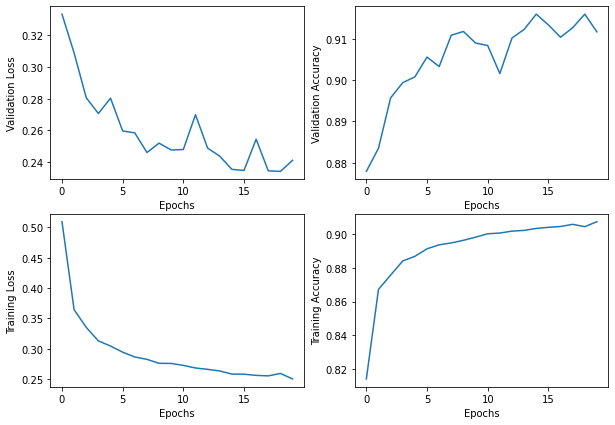

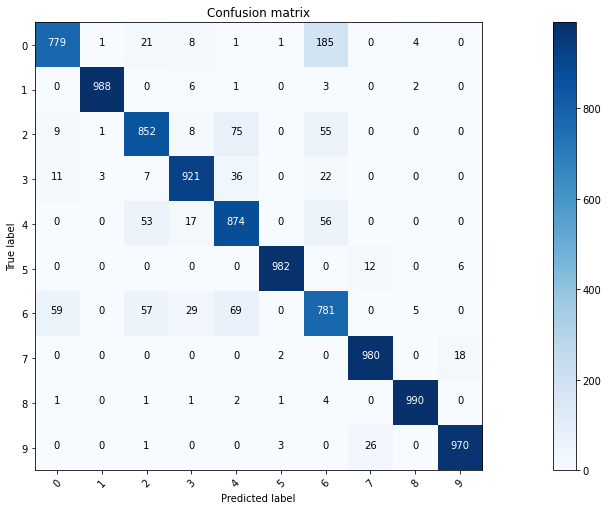

In [31]:
Convmodel(size=5,dropout_size=(0.5),epoch=20,lr1=0.001) #do not include

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)
Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4104 - accuracy: 0.8486 - val_loss: 0.3114 - val_accuracy: 0.8803
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2744 - accuracy: 0.8974 - val_loss: 0.2689 - val_accuracy: 0.9022
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2386 - accuracy: 0.9108 - val_loss: 0.2533 - val_accuracy: 0.9026
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2124 - accuracy: 0.9197 - val_loss: 0.2358 - val_accuracy: 0.9167
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1914 - accuracy: 0.9274 - val_loss: 0.2451 - val_accuracy: 0.9107
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1742 - accuracy: 0.9338 - val_loss: 0.2261 - val_accuracy: 0.9189
Epoch 7/50
1875/1875 [==============================

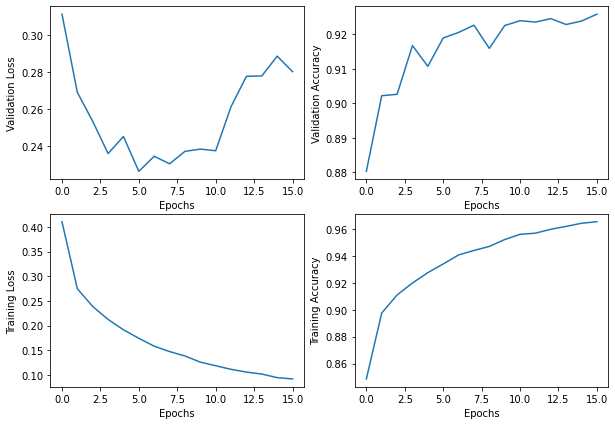

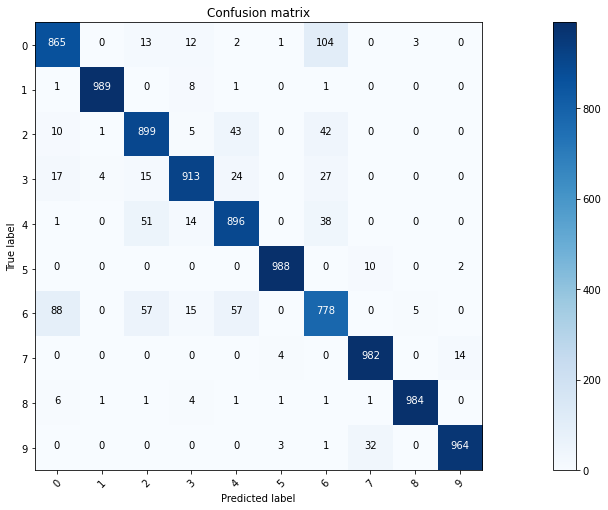

In [32]:
Convmodel(size=3,dropout_size=(0.2),epoch=50,lr1=0.001)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)
Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4760 - accuracy: 0.8267 - val_loss: 0.3289 - val_accuracy: 0.8802
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3303 - accuracy: 0.8788 - val_loss: 0.2926 - val_accuracy: 0.8902
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2950 - accuracy: 0.8913 - val_loss: 0.2705 - val_accuracy: 0.9019
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2719 - accuracy: 0.8987 - val_loss: 0.2559 - val_accuracy: 0.9072
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2557 - accuracy: 0.9051 - val_loss: 0.2425 - val_accuracy: 0.9105
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2456 - accuracy: 0.9087 - val_loss: 0.2415 - val_accuracy: 0.9113
Epoch 7/50
1875/1875 [==============================

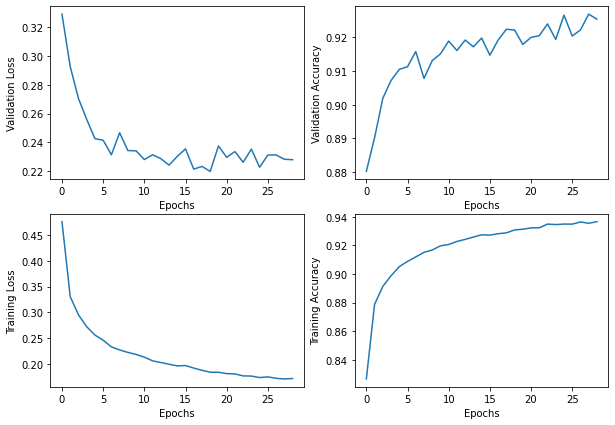

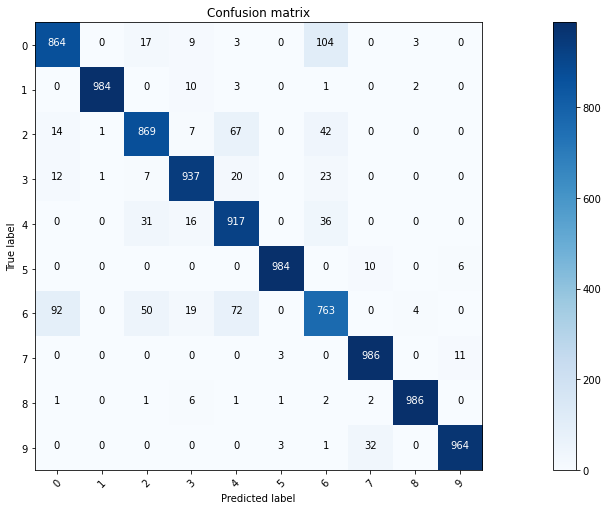

In [33]:
Convmodel(size=3,dropout_size=(0.4),epoch=50,lr1=0.001) #do not include

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)
Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7666 - accuracy: 0.7157 - val_loss: 0.5515 - val_accuracy: 0.7884
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6856 - accuracy: 0.7464 - val_loss: 0.5199 - val_accuracy: 0.8211
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6877 - accuracy: 0.7440 - val_loss: 0.5078 - val_accuracy: 0.8049
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6796 - accuracy: 0.7471 - val_loss: 0.5524 - val_accuracy: 0.7977
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6855 - accuracy: 0.7455 - val_loss: 0.5271 - val_accuracy: 0.7827
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6889 - accuracy: 0.7486 - val_loss: 0.5554 - val_accuracy: 0.7982
Epoch 7/50
1875/1875 [==============================

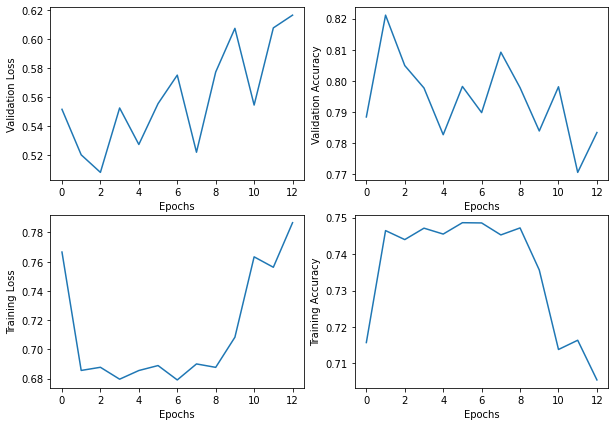

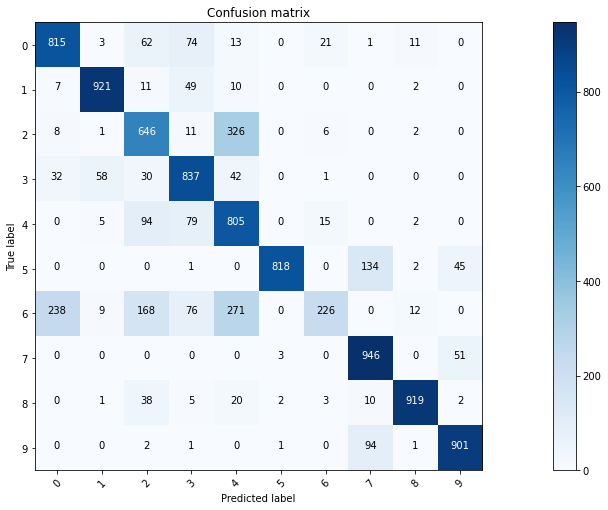

In [34]:
Convmodel(size=3,dropout_size=(0.5),epoch=50,lr1=0.01) #include and say that a lot of fluctuation in curve and also the loss keeps on icreasing for both train and test and acc keeps on decreasing

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)
Epoch 1/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8543 - accuracy: 0.6805 - val_loss: 0.5993 - val_accuracy: 0.7870
Epoch 2/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7578 - accuracy: 0.7140 - val_loss: 0.5587 - val_accuracy: 0.7777
Epoch 3/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7540 - accuracy: 0.7164 - val_loss: 0.6586 - val_accuracy: 0.7444
Epoch 4/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7527 - accuracy: 0.7173 - val_loss: 0.6303 - val_accuracy: 0.7689
Epoch 5/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7597 - accuracy: 0.7179 - val_loss: 0.6224 - val_accuracy: 0.7669
Epoch 6/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.7535 - accuracy: 0.7171 - val_loss: 0.5711 - val_accuracy: 0.7739
Epoch 7/100
1875/1875 [=======================

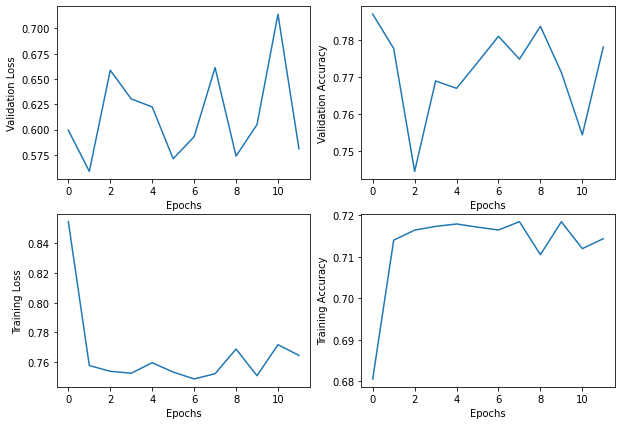

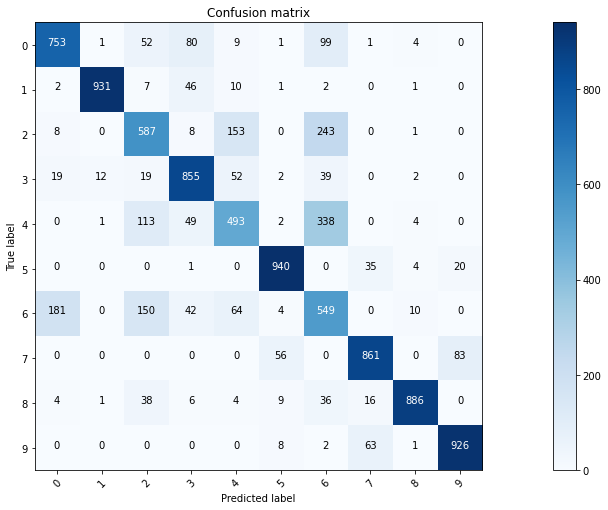

In [35]:
Convmodel(size=5,dropout_size=(0.5),epoch=100,lr1=0.01) # do not include

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)
Epoch 1/70
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5201 - accuracy: 0.8117 - val_loss: 0.3469 - val_accuracy: 0.8746
Epoch 2/70
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3648 - accuracy: 0.8662 - val_loss: 0.3031 - val_accuracy: 0.8896
Epoch 3/70
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3290 - accuracy: 0.8783 - val_loss: 0.2883 - val_accuracy: 0.8935
Epoch 4/70
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3134 - accuracy: 0.8846 - val_loss: 0.2781 - val_accuracy: 0.8972
Epoch 5/70
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2973 - accuracy: 0.8896 - val_loss: 0.2628 - val_accuracy: 0.9013
Epoch 6/70
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2859 - accuracy: 0.8938 - val_loss: 0.2559 - val_accuracy: 0.9063
Epoch 7/70
1875/1875 [==============================

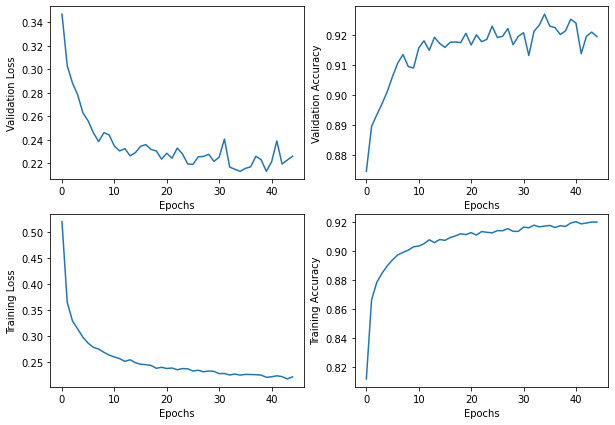

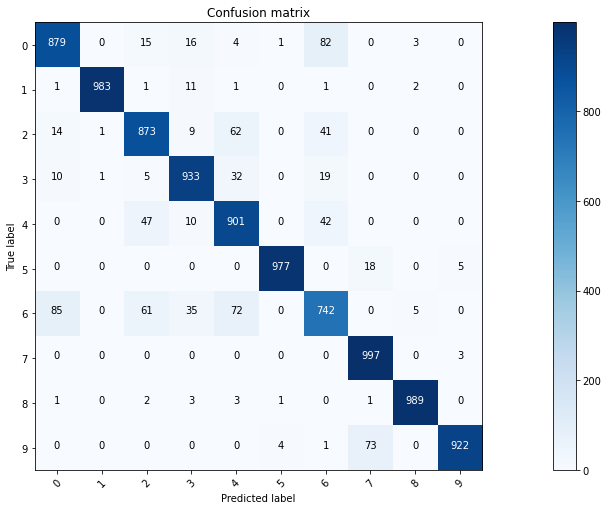

In [36]:
Convmodel(size=3,dropout_size=(0.5),epoch=70,lr1=0.001) # not include

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)
Epoch 1/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5147 - accuracy: 0.8115 - val_loss: 0.3522 - val_accuracy: 0.8750
Epoch 2/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3643 - accuracy: 0.8660 - val_loss: 0.3005 - val_accuracy: 0.8919
Epoch 3/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3256 - accuracy: 0.8795 - val_loss: 0.2958 - val_accuracy: 0.8848
Epoch 4/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3076 - accuracy: 0.8856 - val_loss: 0.2655 - val_accuracy: 0.9024
Epoch 5/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2941 - accuracy: 0.8920 - val_loss: 0.2506 - val_accuracy: 0.9079
Epoch 6/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2806 - accuracy: 0.8979 - val_loss: 0.2634 - val_accuracy: 0.9034
Epoch 7/100
1875/1875 [=======================

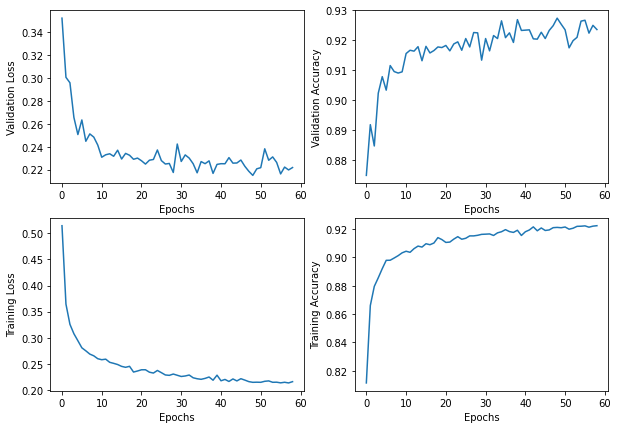

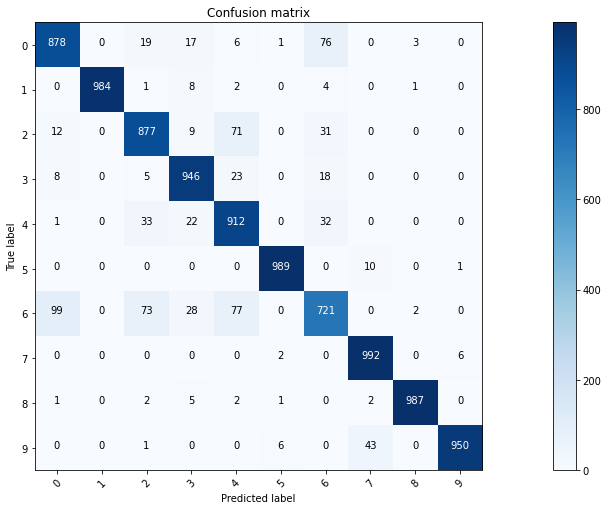

In [37]:
Convmodel(size=3,dropout_size=(0.5),epoch=100,lr1=0.001) #include-- mention adam is used with learning rate 0.001, but haas fluctuations in curves, but converges fast with an accuracy of 92.36%

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)
Epoch 1/150
1875/1875 [==============================] - 8s 4ms/step - loss: 0.9997 - accuracy: 0.6230 - val_loss: 0.6711 - val_accuracy: 0.7520
Epoch 2/150
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6622 - accuracy: 0.7487 - val_loss: 0.5475 - val_accuracy: 0.7984
Epoch 3/150
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5708 - accuracy: 0.7860 - val_loss: 0.5060 - val_accuracy: 0.8054
Epoch 4/150
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5187 - accuracy: 0.8056 - val_loss: 0.4474 - val_accuracy: 0.8354
Epoch 5/150
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4831 - accuracy: 0.8202 - val_loss: 0.4220 - val_accuracy: 0.8469
Epoch 6/150
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4576 - accuracy: 0.8319 - val_loss: 0.4075 - val_accuracy: 0.8507
Epoch 7/150
1875/1875 [=======================

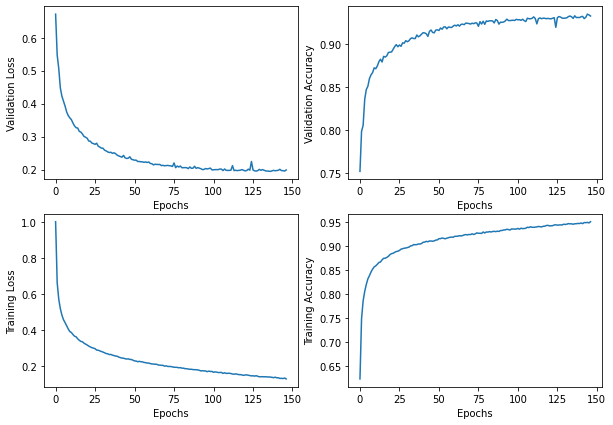

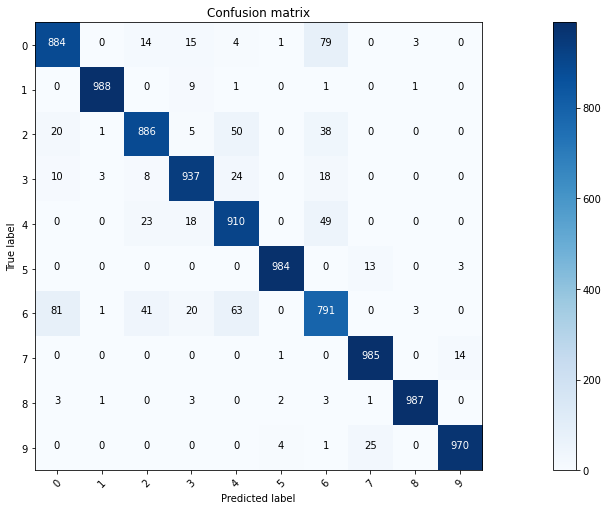

In [29]:
#Using sgd
Convmodel(size=3,dropout_size=(0.4),epoch=150,lr1=0.01) #sgd is used, we get good curves, takes a little more time to converge but we get good accuracy.